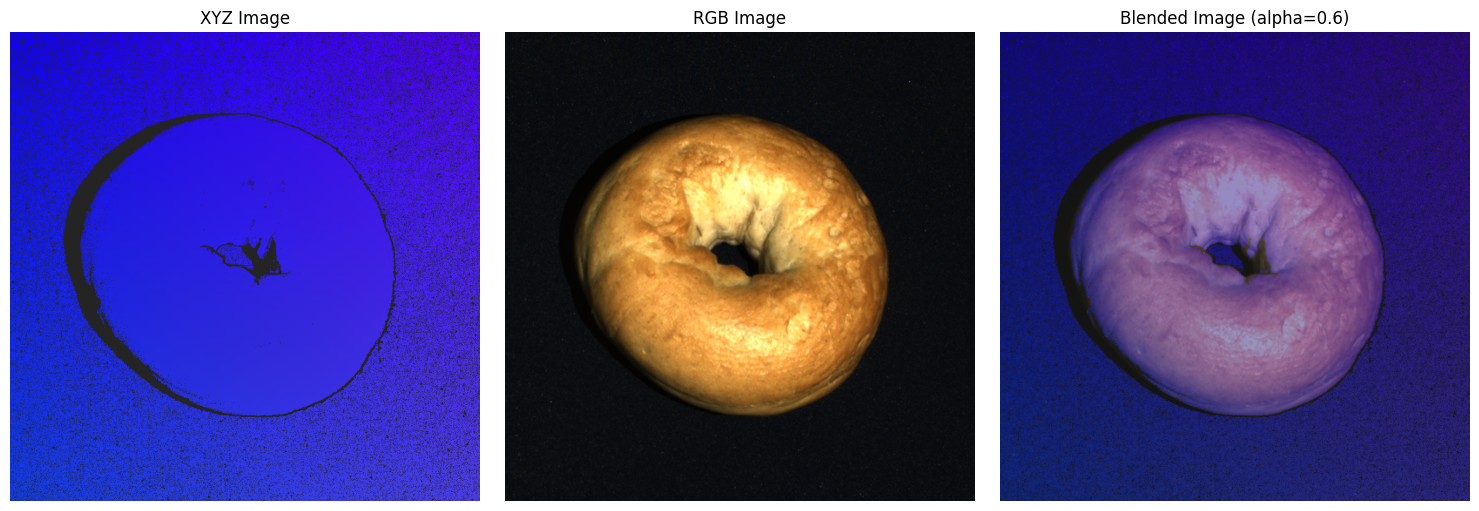

In [9]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 設定圖片路徑
image_xyz_path = r"C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\bagel(xyz)\train\good\000.tiff"
image_rgb_path = r"C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\bagel\train\good\000.png"

# 讀取XYZ圖片
try:
    # 使用tifffile讀取XYZ圖片為NumPy陣列
    xyz_array = tifffile.imread(image_xyz_path)
    
    # 確保數據在有效範圍內 (0-255)
    if xyz_array.dtype != np.uint8:
        # 如果是浮點數，可能需要先標準化再轉換
        if xyz_array.dtype == np.float32 or xyz_array.dtype == np.float64:
            xyz_array = ((xyz_array - xyz_array.min()) / (xyz_array.max() - xyz_array.min()) * 255).astype(np.uint8)
        else:
            xyz_array = (xyz_array / xyz_array.max() * 255).astype(np.uint8)
    
    # 確保陣列有正確的維度和通道排序
    if len(xyz_array.shape) == 2:  # 灰度圖
        image_xyz = Image.fromarray(xyz_array, mode="L").convert("RGB")
    elif len(xyz_array.shape) == 3 and xyz_array.shape[2] == 3:  # 已經是RGB
        image_xyz = Image.fromarray(xyz_array, mode="RGB")
    elif len(xyz_array.shape) == 3 and xyz_array.shape[2] > 3:  # 多通道，取前三個通道
        image_xyz = Image.fromarray(xyz_array[:, :, :3], mode="RGB")
    else:
        raise ValueError(f"無法處理的影像格式: {xyz_array.shape}")
        
except Exception as e:
    print(f"無法讀取或處理XYZ圖片，錯誤訊息：{e}")
    # 創建一個空白圖像作為後備
    image_xyz = Image.new('RGB', (100, 100), color='gray')

# 讀取RGB圖片
image_rgb = Image.open(image_rgb_path).convert('RGB')

# 確保兩個圖像具有相同的尺寸
if image_xyz.size != image_rgb.size:
    image_xyz = image_xyz.resize(image_rgb.size, Image.LANCZOS)

# 現在可以安全地混合兩張圖片
image_added = Image.blend(image_xyz, image_rgb, alpha=0.5)

# 顯示原始圖片和相加後的圖片
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 顯示XYZ圖片
axes[0].imshow(np.array(image_xyz))
axes[0].set_title("XYZ Image")
axes[0].axis('off')

# 顯示RGB圖片
axes[1].imshow(np.array(image_rgb))
axes[1].set_title("RGB Image")
axes[1].axis('off')

# 顯示相加後的圖片
axes[2].imshow(np.array(image_added))
axes[2].set_title("Blended Image (alpha=0.6)")
axes[2].axis('off')

# 顯示圖表
plt.tight_layout()
plt.show()

顯示處理效果示例: C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\potato(xyz)\train\good\000.tiff


C:\Users\anywhere4090\AppData\Local\Temp\ipykernel_23548\3992062811.py:191: UserWarning: Glyph 32005 (\N{CJK UNIFIED IDEOGRAPH-7D05}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\anywhere4090\AppData\Local\Temp\ipykernel_23548\3992062811.py:191: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\anywhere4090\AppData\Local\Temp\ipykernel_23548\3992062811.py:191: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\anywhere4090\AppData\Local\Temp\ipykernel_23548\3992062811.py:191: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\anywhere4090\AppData\Local\Temp\ipykernel_23548\3992062811.py:191: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\anywhere4090\AppData\Local\Temp\ipykernel_2354

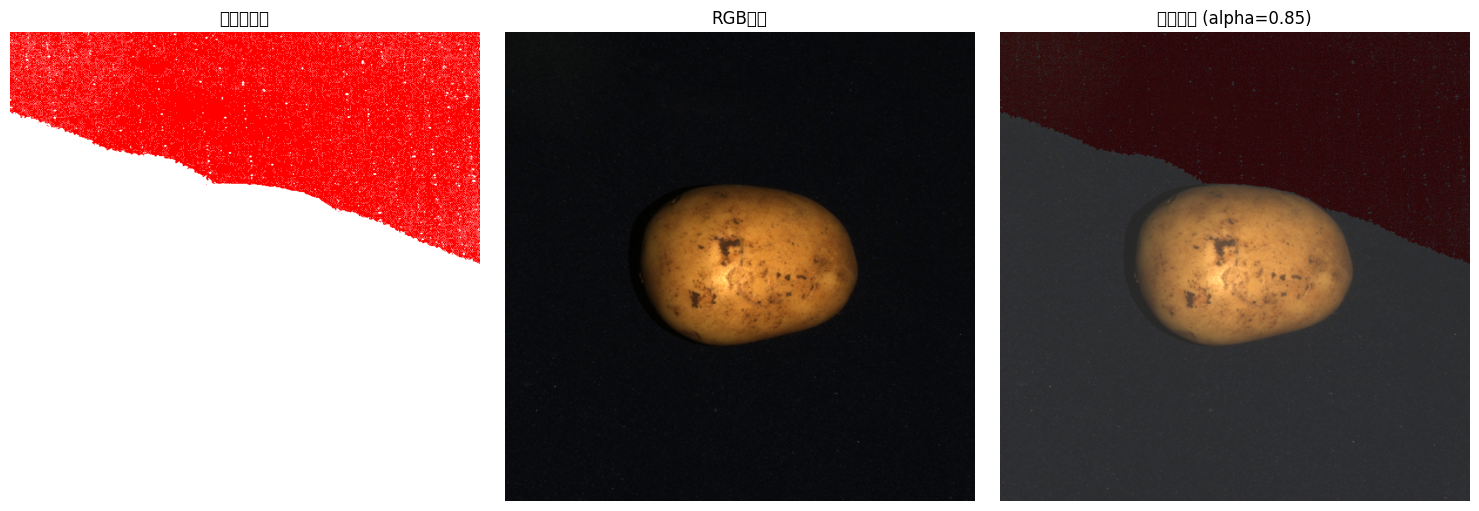

已處理並保存：C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\kknewpotato\train\good\000.png
已處理並保存：C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\kknewpotato\train\good\001.png
已處理並保存：C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\kknewpotato\train\good\002.png
已處理並保存：C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\kknewpotato\train\good\003.png
已處理並保存：C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\kknewpotato\train\good\004.png
已處理並保存：C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\kknewpotato\train\good\005.png
已處理並保存：C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\kknewpotato\train\good\006.png
已處理並保存：C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\kknewpotato\train\good\007.png
已處理並保存：C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d\kknew

In [5]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import shutil

# 設定路徑
base_dir = r"C:\Users\anywhere4090\Desktop\ggmfg\Dynamic-noise-AD-master\dataset\mvtec3d"
xyz_base_dir = os.path.join(base_dir, "potato(xyz)")
rgb_base_dir = os.path.join(base_dir, "potato")
output_base_dir = os.path.join(base_dir, "kknewpotato")

# 確保輸出目錄存在
if not os.path.exists(output_base_dir):
    os.makedirs(output_base_dir)

# 處理函數：讀取XYZ圖像並轉換成紅白兩色的PIL圖像
def process_xyz_image(xyz_path, use_red_white=True, threshold_percentile=70):
    try:
        # 使用tifffile讀取XYZ圖片為NumPy陣列
        xyz_array = tifffile.imread(xyz_path)
        
        if use_red_white:
            # 如果是3D圖，取Z通道（深度）
            if len(xyz_array.shape) == 3 and xyz_array.shape[2] >= 3:
                depth_array = xyz_array[:, :, 2]  # 假設Z是第三個通道
            elif len(xyz_array.shape) == 3:
                # 如果不是RGB格式，取平均值作為深度
                depth_array = np.mean(xyz_array, axis=2)
            else:
                # 已經是2D圖，直接使用
                depth_array = xyz_array
            
            # 標準化深度數據到0-1範圍
            if depth_array.dtype != np.uint8:
                depth_norm = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min() + 1e-8)
            else:
                depth_norm = depth_array / 255.0
            
            # 根據閾值將深度圖像轉換為二值圖像
            # 使用百分位數作為閾值以適應不同的深度分佈
            threshold = np.percentile(depth_norm, threshold_percentile)
            binary_mask = depth_norm > threshold
            
            # 創建紅白兩色圖像
            red_white_array = np.zeros((depth_array.shape[0], depth_array.shape[1], 3), dtype=np.uint8)
            # 白色背景
            red_white_array.fill(255)  
            # 紅色前景（物體）
            red_white_array[binary_mask, 0] = 255  # R
            red_white_array[binary_mask, 1] = 0    # G
            red_white_array[binary_mask, 2] = 0    # B
            
            # 轉換為PIL圖像
            return Image.fromarray(red_white_array, mode="RGB")
        else:
            # 原始處理邏輯（非紅白轉換）
            # 確保數據在有效範圍內 (0-255)
            if xyz_array.dtype != np.uint8:
                # 如果是浮點數，可能需要先標準化再轉換
                if xyz_array.dtype == np.float32 or xyz_array.dtype == np.float64:
                    xyz_array = ((xyz_array - xyz_array.min()) / (xyz_array.max() - xyz_array.min() + 1e-8) * 255).astype(np.uint8)
                else:
                    xyz_array = (xyz_array / (xyz_array.max() + 1e-8) * 255).astype(np.uint8)
            
            # 確保陣列有正確的維度和通道排序
            if len(xyz_array.shape) == 2:  # 灰度圖
                image_xyz = Image.fromarray(xyz_array, mode="L").convert("RGB")
            elif len(xyz_array.shape) == 3 and xyz_array.shape[2] == 3:  # 已經是RGB
                image_xyz = Image.fromarray(xyz_array, mode="RGB")
            elif len(xyz_array.shape) == 3 and xyz_array.shape[2] > 3:  # 多通道，取前三個通道
                image_xyz = Image.fromarray(xyz_array[:, :, :3], mode="RGB")
            else:
                raise ValueError(f"無法處理的影像格式: {xyz_array.shape}")
            
            return image_xyz
    
    except Exception as e:
        print(f"無法讀取或處理XYZ圖片 {xyz_path}，錯誤訊息：{e}")
        # 返回None表示處理失敗
        return None

# 處理dataset中的所有圖像
def process_dataset(xyz_dir, rgb_dir, output_dir, set_type, use_red_white=True, threshold_percentile=70, blend_alpha=0.85):
    # 遍歷指定集合(訓練集或測試集)
    for category_folder in os.listdir(os.path.join(xyz_dir, set_type)):
        # 確保對應的輸出目錄存在
        output_category_path = os.path.join(output_dir, set_type, category_folder)
        if not os.path.exists(output_category_path):
            os.makedirs(output_category_path)
        
        # 處理該類別下的所有圖像
        category_xyz_path = os.path.join(xyz_dir, set_type, category_folder)
        category_rgb_path = os.path.join(rgb_dir, set_type, category_folder)
        
        # 確保RGB目錄存在
        if not os.path.exists(category_rgb_path):
            print(f"警告：RGB目錄不存在 {category_rgb_path}")
            continue
        
        # 處理該類別下的所有圖像
        for filename in os.listdir(category_xyz_path):
            if filename.endswith('.tiff') or filename.endswith('.tif'):
                # 構建路徑
                xyz_file_path = os.path.join(category_xyz_path, filename)
                
                # 對應的RGB文件名（可能有不同的擴展名）
                rgb_filename = os.path.splitext(filename)[0] + '.png'  # 假設RGB是PNG格式
                rgb_file_path = os.path.join(category_rgb_path, rgb_filename)
                
                # 如果對應的RGB文件不存在，嘗試其他擴展名
                if not os.path.exists(rgb_file_path):
                    for ext in ['.jpg', '.jpeg', '.bmp']:
                        alt_rgb_filename = os.path.splitext(filename)[0] + ext
                        alt_rgb_file_path = os.path.join(category_rgb_path, alt_rgb_filename)
                        if os.path.exists(alt_rgb_file_path):
                            rgb_file_path = alt_rgb_file_path
                            rgb_filename = alt_rgb_filename
                            break
                
                # 檢查對應的RGB文件是否存在
                if not os.path.exists(rgb_file_path):
                    print(f"警告：找不到對應的RGB文件 {rgb_file_path}")
                    continue
                
                # 處理圖像
                try:
                    # 讀取並處理XYZ圖像
                    image_xyz = process_xyz_image(xyz_file_path, use_red_white, threshold_percentile)
                    if image_xyz is None:
                        continue
                    
                    # 讀取RGB圖像
                    image_rgb = Image.open(rgb_file_path).convert('RGB')
                    
                    # 確保兩個圖像具有相同的尺寸
                    if image_xyz.size != image_rgb.size:
                        image_xyz = image_xyz.resize(image_rgb.size, Image.LANCZOS)
                    
                    # 混合兩張圖片
                    image_blended = Image.blend(image_xyz, image_rgb, alpha=blend_alpha)
                    
                    # 保存混合後的圖片
                    output_file_path = os.path.join(output_category_path, os.path.splitext(filename)[0] + '.png')
                    image_blended.save(output_file_path)
                    
                    print(f"已處理並保存：{output_file_path}")
                    
                except Exception as e:
                    print(f"處理圖像時發生錯誤 {xyz_file_path} 和 {rgb_file_path}：{e}")

# 顯示處理效果
def show_example(xyz_path, rgb_path, use_red_white=True, threshold_percentile=70, blend_alpha=0.85):
    # 讀取並處理XYZ圖像
    image_xyz = process_xyz_image(xyz_path, use_red_white, threshold_percentile)
    if image_xyz is None:
        print("無法處理XYZ圖像")
        return
    
    # 讀取RGB圖像
    image_rgb = Image.open(rgb_path).convert('RGB')
    
    # 確保兩個圖像具有相同的尺寸
    if image_xyz.size != image_rgb.size:
        image_xyz = image_xyz.resize(image_rgb.size, Image.LANCZOS)
    
    # 混合兩張圖片
    image_blended = Image.blend(image_xyz, image_rgb, alpha=blend_alpha)
    
    # 顯示結果
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    if use_red_white:
        title_xyz = "紅白深度圖"
    else:
        title_xyz = "原始深度圖"
    
    axes[0].imshow(np.array(image_xyz))
    axes[0].set_title(title_xyz)
    axes[0].axis('off')
    
    axes[1].imshow(np.array(image_rgb))
    axes[1].set_title("RGB圖像")
    axes[1].axis('off')
    
    axes[2].imshow(np.array(image_blended))
    axes[2].set_title(f"混合圖像 (alpha={blend_alpha})")
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# 主程序
def main():
    # 設定參數
    use_red_white = True  # 是否使用紅白兩色模式
    threshold_percentile = 70  # 控制深度閾值的百分位數，數值越高，紅色區域越少
    blend_alpha = 0.85  # 控制混合比例，數值越高，RGB圖像的影響越大
    
    # 可選：顯示單個示例的處理效果
    # 尋找示例文件
    test_xyz_file = None
    test_rgb_file = None
    
    train_good_xyz = os.path.join(xyz_base_dir, 'train', 'good')
    train_good_rgb = os.path.join(rgb_base_dir, 'train', 'good')
    
    if os.path.exists(train_good_xyz) and os.path.exists(train_good_rgb):
        for filename in os.listdir(train_good_xyz):
            if filename.endswith('.tiff') or filename.endswith('.tif'):
                test_xyz_file = os.path.join(train_good_xyz, filename)
                rgb_filename = os.path.splitext(filename)[0] + '.png'
                test_rgb_file = os.path.join(train_good_rgb, rgb_filename)
                
                if os.path.exists(test_rgb_file):
                    # 找到匹配的文件，顯示處理效果
                    print(f"顯示處理效果示例: {test_xyz_file}")
                    show_example(test_xyz_file, test_rgb_file, use_red_white, threshold_percentile, blend_alpha)
                    break
    
    # 處理訓練集
    process_dataset(xyz_base_dir, rgb_base_dir, output_base_dir, 'train', use_red_white, threshold_percentile, blend_alpha)
    
    # 處理測試集
    process_dataset(xyz_base_dir, rgb_base_dir, output_base_dir, 'test', use_red_white, threshold_percentile, blend_alpha)
    
    print("所有處理完成！")

# 執行主程序
if __name__ == "__main__":
    main()